## The various tasks at hand are as follows:
1. Exploratory Data Analysis
2. Data pre-processing
3. Data Modeling (with Training/Test Data)
4. Learining the top keywords across resumes.
5. Priortizing resume based on recruiter keywords.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split+
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.makedirs('/content/gdrive/MyDrive/Colab Notebooks/Lecture_series/', exist_ok=True)


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/Lecture_series/')
!ls

UpdatedResumeDataSet.csv


In [ ]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

#1. Exploratory Data Analysis (EDA)

In [ ]:
category = df['Category'].value_counts().reset_index()
category

,Category,count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Sales,40
8,Data Science,40
9,Mechanical Engineer,40


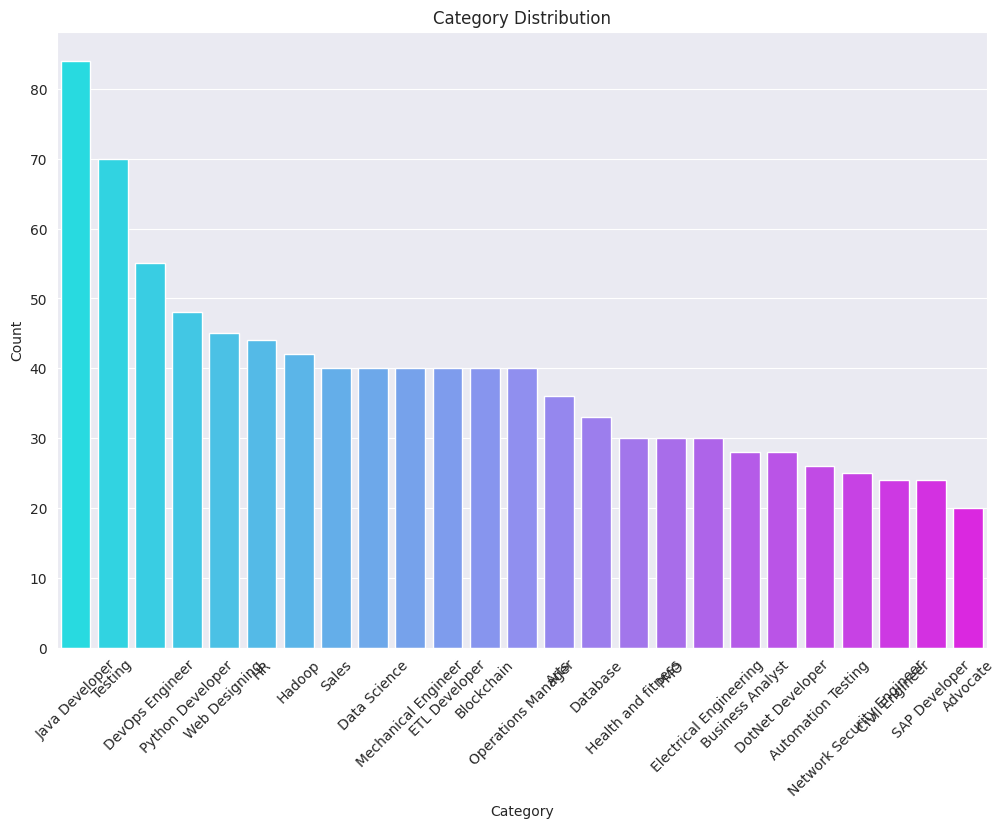

In [ ]:
# Count occurrences of each category
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Count', data=category_counts, palette='cool')
plt.xticks(rotation=45)
plt.title("Category Distribution")
plt.show()

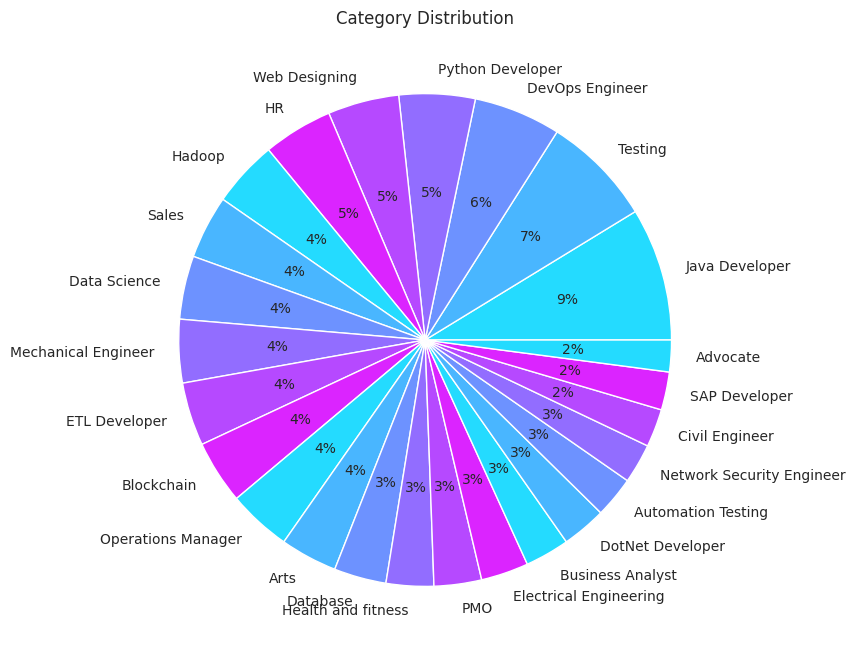

In [ ]:
# Count occurrences of each category
category_counts = df['Category'].value_counts()

# Pie chart
plt.figure(figsize=(12, 8))
plt.pie(category_counts, labels=category_counts.index,
        colors=sns.color_palette('cool'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

#2. Data Pre-processing:
1. Data Cleaning
2. Data Encoding

In [ ]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [ ]:
df['cleaned'] = df['Resume'].apply(lambda x:cleanResume(x))
df.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
#getting the entire resume text
corpus=" "
for i in range(0,len(df)):
    corpus= corpus+ df["cleaned"][i]

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

411913

In [ ]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
words[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [ ]:
# Now encode the data
label = LabelEncoder()
df['new_Category'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,cleaned,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


(array([ 82.,  68.,  97.,  83.,  70., 116., 124.,  95.,  72., 155.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

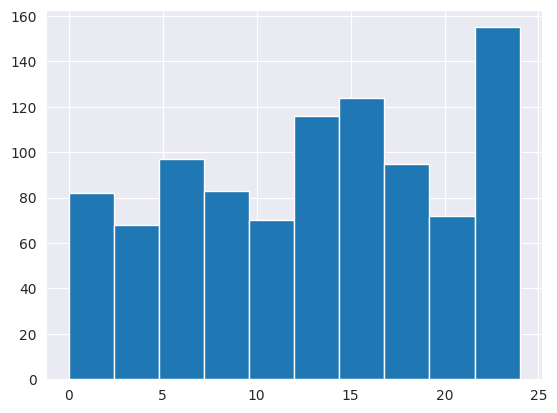

In [ ]:
plt.hist(df['new_Category'])

In [ ]:
# Vectorizing the cleaned columns
text = df['cleaned'].values
target = df['new_Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

In [ ]:
WordFeatures.shape

(962, 1500)

# 3: Train Test Data and Modeling

In [ ]:
# Separate train and test data
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shapea

((769, 1500), (193, 1500), (769,), (193,))

In [ ]:
# Model Training
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [ ]:
# Prediction
y_pred = model.predict(X_test)

In [ ]:
print(f'---------------------------------')
print(f'| Training Accuracy   :- {round(model.score(X_train, y_train) * 100, 2)}% |')
print(f'---------------------------------')
print(f'| Validation Accuracy :- {round(model.score(X_test, y_test) * 100, 2)}% |')
print(f'---------------------------------')


---------------------------------
| Training Accuracy   :- 98.96% |
---------------------------------
| Validation Accuracy :- 96.89% |
---------------------------------


In [ ]:
print(metrics.classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

#4. To learn the top keywords to analyze.

In [ ]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [ ]:
words_new[0:5]

['skills', 'programming', 'languages', 'python', 'pandas']

In [ ]:
  import nltk
  nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Perform Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wn = WordNetLemmatizer()
lem_words=[]
for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
lem_words[0:5]

['skill', 'programming', 'language', 'python', 'panda']

In [ ]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 264
Number of words not Lemmatized= 1568


<Axes: xlabel='Samples', ylabel='Counts'>

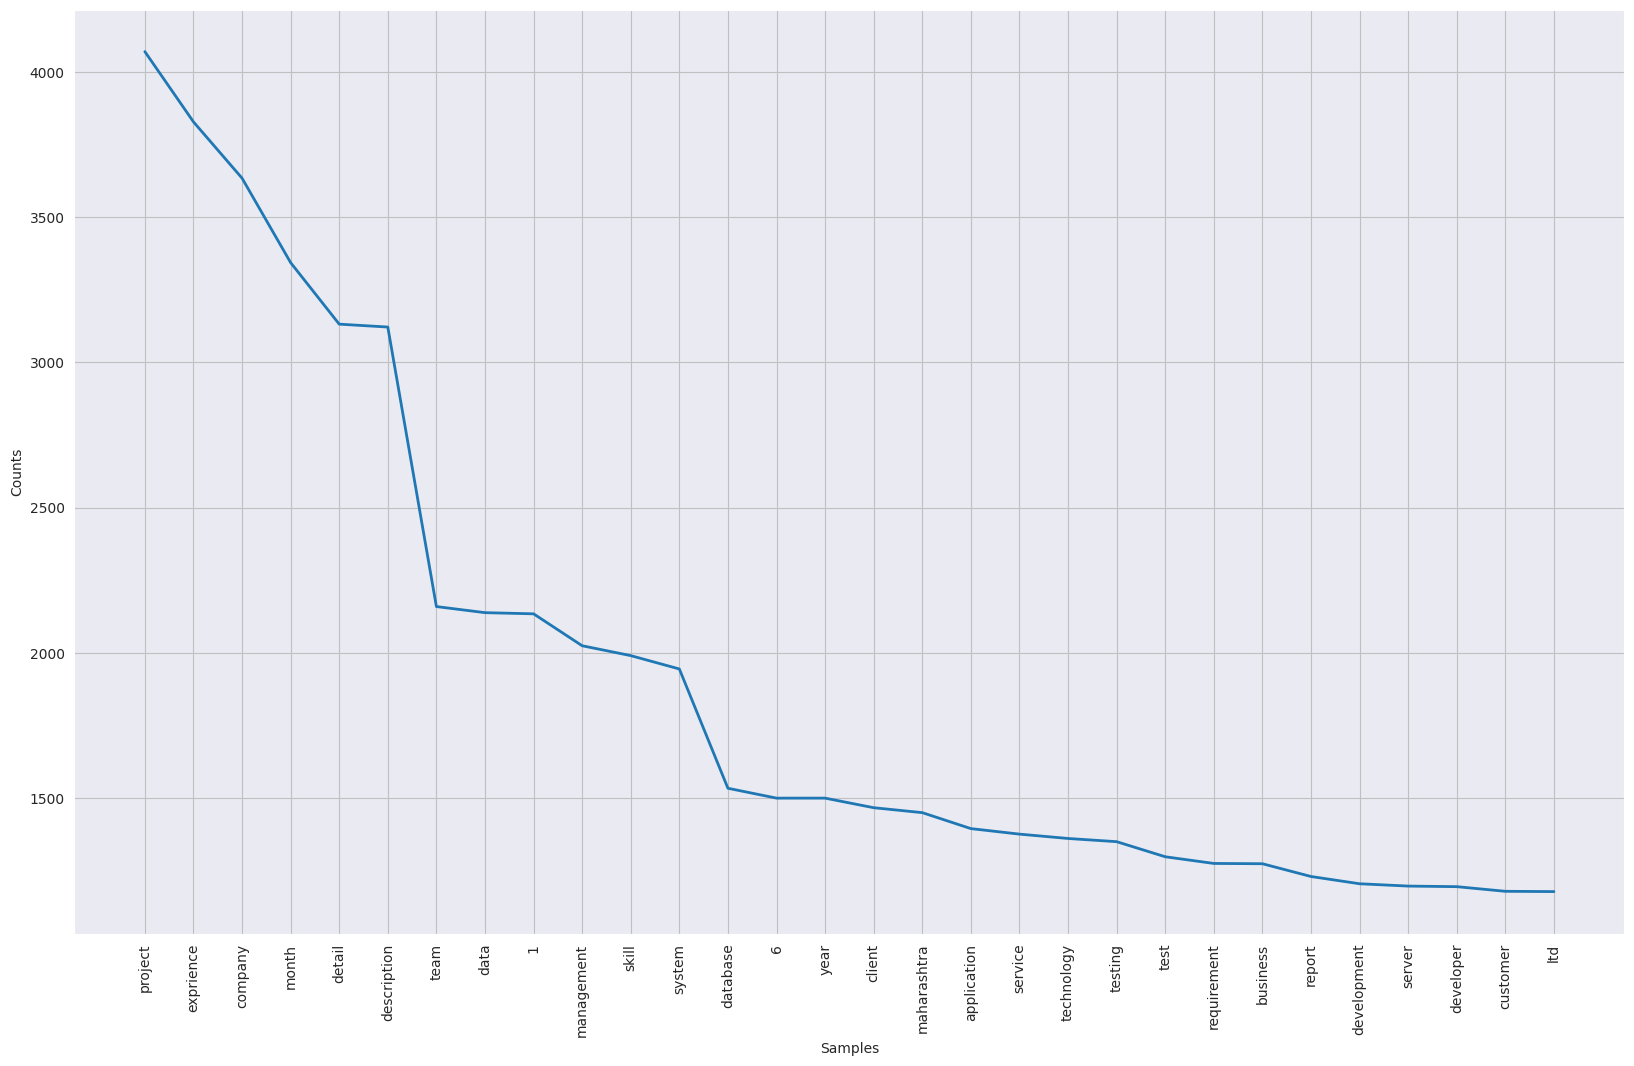

In [ ]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

5.  Priortizing resume based on recruiter keywords

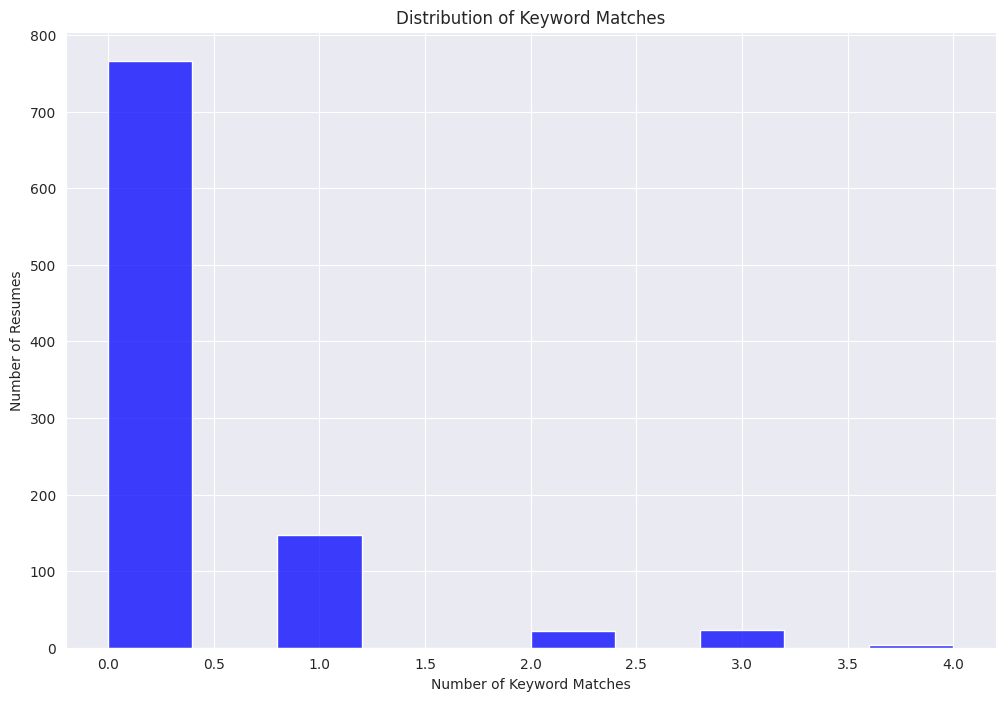

In [ ]:
# Example keywords based on recruiter needs
recruiter_keywords = ['python', 'data analysis', 'machine learning', 'nlp', 'statistics']
# Function to check for keyword presence
def keyword_match(resume, keywords):
    resume = resume.lower()  # Ensure case-insensitive matching
    count = sum(1 for word in keywords if word in resume)
    return count

# Apply the function to the cleaned resumes
df['keyword_matches'] = df['cleaned'].apply(lambda x: keyword_match(x, recruiter_keywords))
# Filter resumes with at least one keyword match
filtered_resumes = df[df['keyword_matches'] > 0]

# Display filtered resumes
filtered_resumes[['Resume', 'keyword_matches']]
plt.figure(figsize=(12, 8))
sns.histplot(df['keyword_matches'], bins=10, kde=False, color='blue')
plt.title("Distribution of Keyword Matches")
plt.xlabel("Number of Keyword Matches")
plt.ylabel("Number of Resumes")
plt.show()



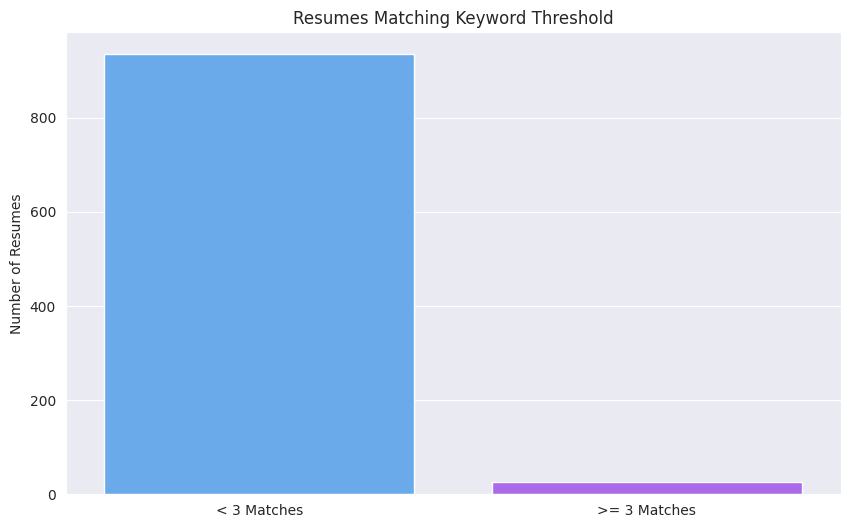

In [ ]:
# Bar chart for the number of resumes meeting the threshold
plt.figure(figsize=(10, 6))
sns.barplot(
    x=['< 3 Matches', '>= 3 Matches'],
    y=[len(df[df['keyword_matches'] < 3]), len(df[df['keyword_matches'] >= 3])],
    palette='cool'
)
plt.title("Resumes Matching Keyword Threshold")
plt.ylabel("Number of Resumes")
plt.show()


In [ ]:
# Filter resumes with at least 3 keyword matches
resumes_with_at_least_three = df[df['keyword_matches'] >= 3]

# Display the list of these resumes
resumes_with_at_least_three_list = resumes_with_at_least_three[['Resume', 'keyword_matches']]

# Print the list
print(f"Number of resumes with at least 3 keyword matches: {len(resumes_with_at_least_three_list)}")
print(resumes_with_at_least_three_list)


Number of resumes with at least 3 keyword matches: 27
                                                Resume  keyword_matches
2    Areas of Interest Deep Learning, Control Syste...                3
3    Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...                3
6    Skills â¢ Python â¢ Tableau â¢ Data Visuali...                3
7    Education Details \r\n B.Tech   Rayat and Bahr...                3
8    Personal Skills â¢ Ability to quickly grasp t...                3
9    Expertise â Data and Quantitative Analysis â...                4
12   Areas of Interest Deep Learning, Control Syste...                3
13   Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...                3
16   Skills â¢ Python â¢ Tableau â¢ Data Visuali...                3
17   Education Details \r\n B.Tech   Rayat and Bahr...                3
18   Personal Skills â¢ Ability to quickly grasp t...                3
19   Expertise â Data and Quantitative Analysis â...                4
22   Areas